<img src="https://i.imgur.com/FoKB5Z5.png" align="left" width="300" height="250" title="source: imgur.com" /></a>

## Program Code: J620-002-4:2020 

## Program Name: FRONT-END SOFTWARE DEVELOPMENT

## Title : P65 - Classification of Fashion MNIST data using Keras

#### Name: 

#### IC Number:

#### Date :

#### Introduction : 



#### Conclusion :






## Basic classification: Classify images of clothing

This exercise is adapted from https://www.tensorflow.org/tutorials/keras/classification

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses tf.keras, a high-level API to build and train models in TensorFlow.

**Step 1:** Set up the libraries and environment

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


**Step 2:** import the fashion MNIST dataset. Loading the dataset returns four NumPy arrays. 
    
The train_images and train_labels arrays are the training set—the data the model uses to learn.



In [4]:
fashion_mnist = keras.datasets.fashion_mnist

# load the data into the following: training and test images and labels
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

**Step 3:** Examine the data:

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. 

**Q:** what are the corresponding classes of clothing the image represents?


**Step 4:** store the classes under the variable *class_names*.

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Step 5:** Explore the data:
Let's explore the format of the dataset before training the model. What are the dimension of your data? what is the size of your images? How many samples do you have in total?

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

**Note:** to view the images:

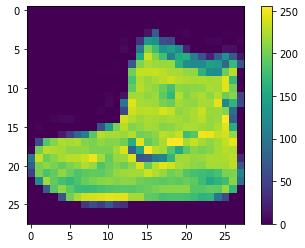

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Step 6:** Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255.

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

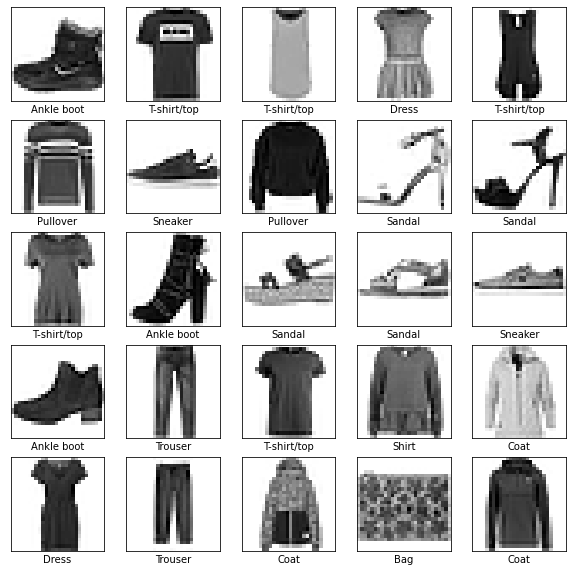

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build the model
Building the neural network requires configuring the layers of the model, then compiling the model.

**Step 7:** Set up the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

Do the following: 
1. The first layer in this network, use **tf.keras.layers.Flatten**. It transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.
2. After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has **128 nodes** (or neurons). 
3. The second (and last) layer returns a logits array with length of **10**. Each node contains a score that indicates the current image belongs to one of the 10 classes.

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

**Step 8:** Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
Optimizer —This is how the model is updated based on the data it sees and its loss function.
Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model
Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the test_images array.
4. Verify that the predictions match the labels from the test_labels array.

**Step 9:** Feed the model: To start training, call the model.fit method—so called because it "fits" the model to the training data

In [16]:
model.fit(train_images, train_labels, epochs=10)    

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4972 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3736 - accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3362 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3116 - accuracy: 0.8874
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2949 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2799 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2700 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2575 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2484 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.241

**Step 10:** What should be the next step? :D

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3396 - accuracy: 0.8817

Test accuracy: 0.8816999793052673


**Step 11:** Now try out prediction with the test_images. You may use Softmax() or any suitable options

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

In [21]:
predictions[0]
np.argmax(predictions[0])
test_labels[0]

9

### Verify predictions
With the model trained, you can use it to make predictions about some images.

Run the following code first.

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [1]:
i = 11
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i], test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i], test_labels)
plt.show()

NameError: name 'plt' is not defined

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

**Note** that the model can be wrong even when very confident

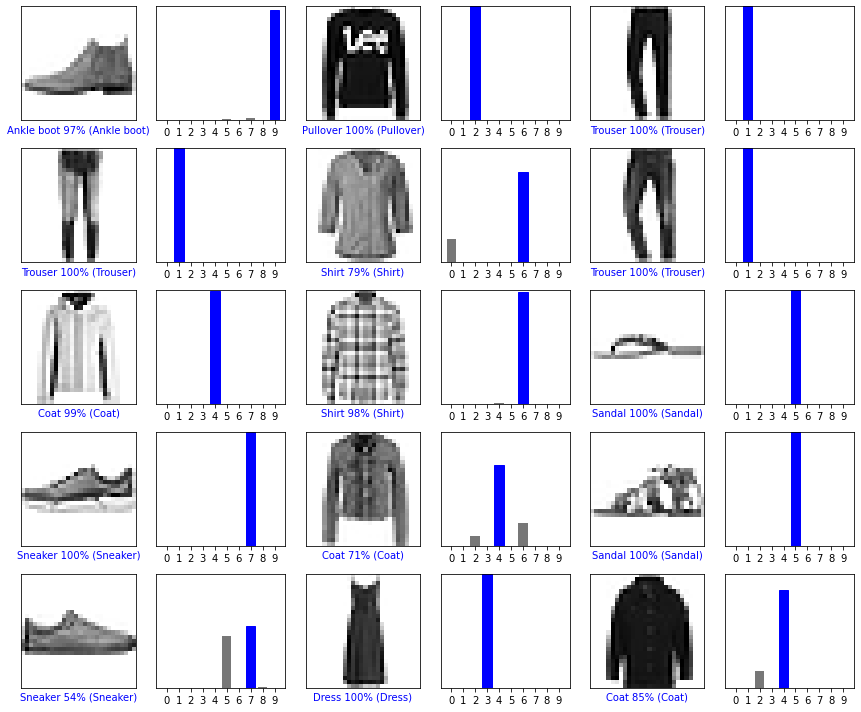

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()